<a href="https://colab.research.google.com/github/Phionanamugga/Energy_Projects/blob/feature1/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](*https*://)

ARIMA Forecasting for Battery State of Charge (SoC)

/tmp/ipython-input-1701278870.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hours = pd.date_range(start="2025-01-01", periods=100, freq="H")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Test RMSE: 15.07


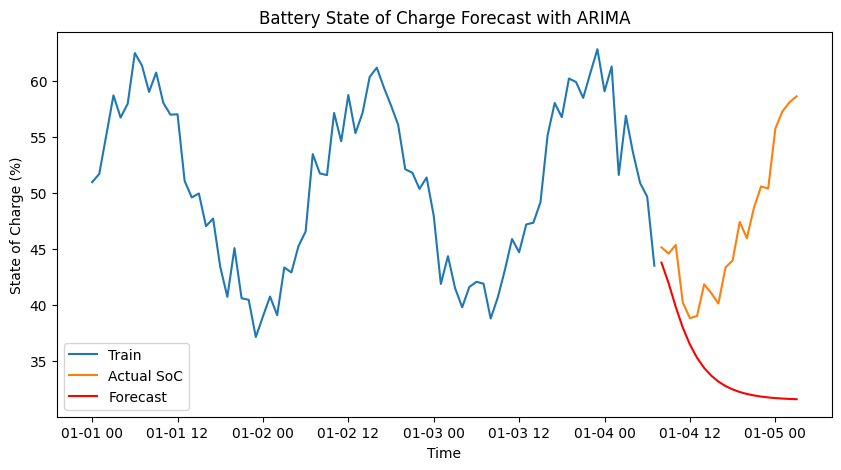

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# ----------------------------
# 1. Load Example Battery SoC Data
# ----------------------------
# Example: Hourly SoC values (%) over 100 hours
np.random.seed(42)
hours = pd.date_range(start="2025-01-01", periods=100, freq="H")
soc = 50 + np.sin(np.linspace(0, 20, 100)) * 10 + np.random.normal(0, 2, 100)

df = pd.DataFrame({"Time": hours, "SoC": soc})
df.set_index("Time", inplace=True)

# ----------------------------
# 2. Train-Test Split
# ----------------------------
train_size = int(len(df) * 0.8)
train, test = df.SoC[:train_size], df.SoC[train_size:]

# ----------------------------
# 3. Build ARIMA Model
# ----------------------------
# ARIMA(p,d,q) parameters → tune based on data
model = ARIMA(train, order=(2,1,2))  # p=2, d=1, q=2 as example
model_fit = model.fit()

# ----------------------------
# 4. Forecast
# ----------------------------
forecast = model_fit.forecast(steps=len(test))

# ----------------------------
# 5. Evaluate & Visualize
# ----------------------------
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Test RMSE: {rmse:.2f}")

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual SoC")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.title("Battery State of Charge Forecast with ARIMA")
plt.xlabel("Time")
plt.ylabel("State of Charge (%)")
plt.legend()
plt.show()
